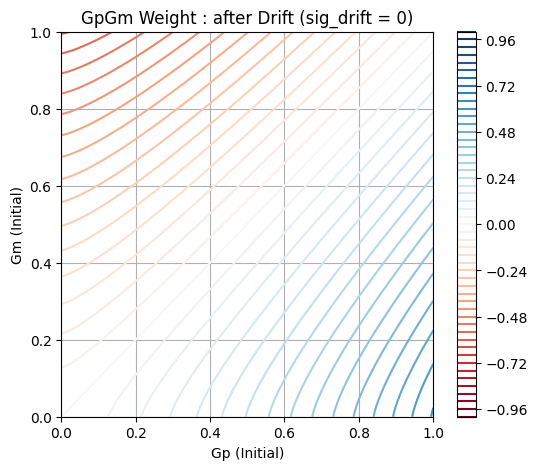

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Drift time
t = 1e9

# Normalized conductance range
g_relative = torch.linspace(0.0, 1.0, 1000)

# Drift coefficients (sig_drift = 0)
mu_drift = (-0.0155 * torch.log(g_relative + 0.00762) + 0.0244).clamp(max=0.1)
gp_t0 = g_relative.clone()
gm_t0 = g_relative.clone()

# Apply drift: G(t) = G0 * t^{-mu}
gp_drift = gp_t0 * t ** (-mu_drift)
gm_drift = gm_t0 * t ** (-mu_drift)

# Meshgrid and drifted weight difference
X, Y = np.meshgrid(gp_drift.numpy(), gm_drift.numpy())
weight = X - Y

# Plot
plt.figure(figsize=(6, 5))
contour = plt.contour(gp_t0, gm_t0, weight, levels=np.linspace(-1, 1, 51), cmap='RdBu')
plt.colorbar(contour)
plt.xlabel('Gp (Initial)')
plt.ylabel('Gm (Initial)')
plt.title('GpGm Weight : after Drift (sig_drift = 0)')
plt.grid(True)
plt.show()


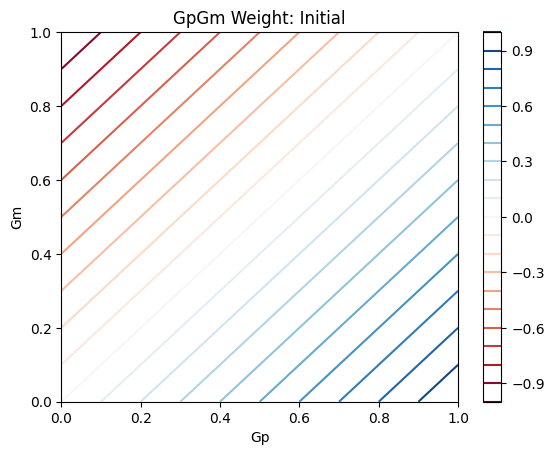

In [6]:
# Plot
X0, Y0 = np.meshgrid(gp_t0, gm_t0)
weight0 = X0 - Y0
plt.contour(X0, Y0, weight0, levels=np.linspace(-1, 1, 21), cmap='RdBu')
plt.colorbar()
plt.xlabel('Gp')
plt.ylabel('Gm')
plt.title('GpGm Weight: Initial')
plt.show()

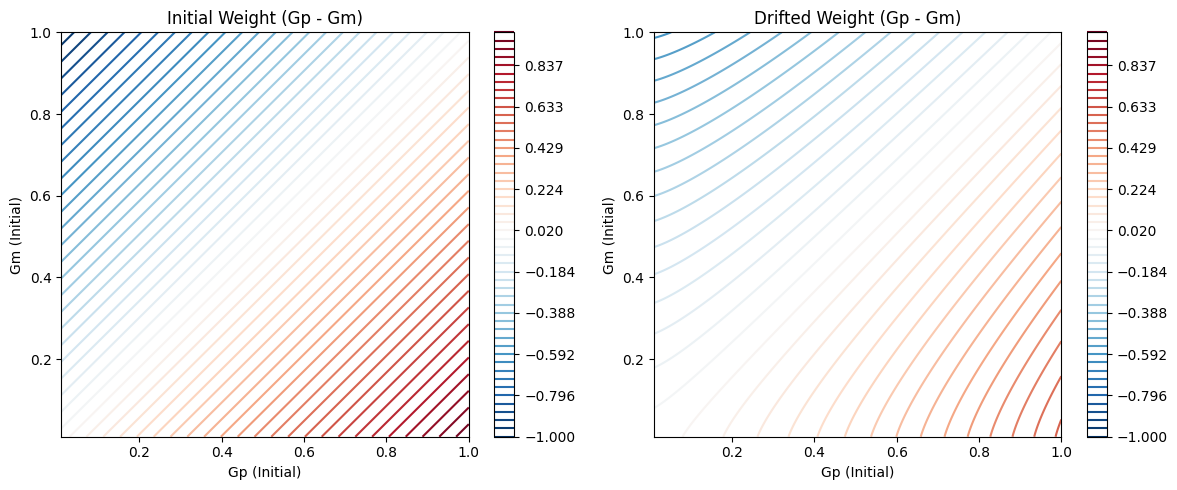

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Parameters
t = 1e9
g_relative = torch.linspace(0.01, 1.0, 500)  # avoid log(0)

# Make meshgrid
gp_init, gm_init = torch.meshgrid(g_relative, g_relative, indexing='ij')
weight_initial = gp_init - gm_init

# Drift coefficients
mu_gp = (-0.0155 * torch.log(gp_init + 0.00762) + 0.0244).clamp(max=0.1)
mu_gm = (-0.0155 * torch.log(gm_init + 0.00762) + 0.0244).clamp(max=0.1)

# Apply drift
gp_drift = gp_init * t ** (-mu_gp)
gm_drift = gm_init * t ** (-mu_gm)
weight_drifted = gp_drift - gm_drift

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Initial weight contour
cs1 = axs[0].contour(gp_init, gm_init, weight_initial, levels=np.linspace(-1, 1, 50), cmap='RdBu_r')
axs[0].set_title("Initial Weight (Gp - Gm)")
axs[0].set_xlabel("Gp (Initial)")
axs[0].set_ylabel("Gm (Initial)")
fig.colorbar(cs1, ax=axs[0])

# Drifted weight contour
cs2 = axs[1].contour(gp_init, gm_init, weight_drifted, levels=np.linspace(-1, 1, 50), cmap='RdBu_r')
axs[1].set_title("Drifted Weight (Gp - Gm)")
axs[1].set_xlabel("Gp (Initial)")
axs[1].set_ylabel("Gm (Initial)")
fig.colorbar(cs2, ax=axs[1])

plt.tight_layout()
plt.show()


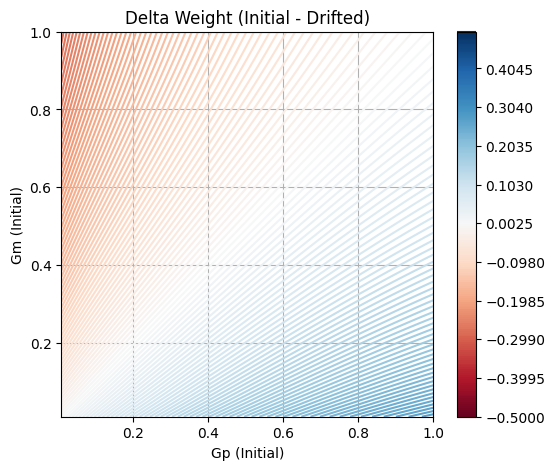

In [47]:
weight_delta = weight_initial - weight_drifted

# Plot
plt.figure(figsize=(6, 5))
contour = plt.contour(gp_init.numpy(), gm_init.numpy(), weight_delta.numpy(),
                      levels=np.linspace(-0.5, 0.5, 200), cmap='RdBu')
plt.colorbar(contour)
plt.xlabel('Gp (Initial)')
plt.ylabel('Gm (Initial)')
plt.title('Delta Weight (Initial - Drifted)')
plt.grid(True)
plt.show()